In [1]:
import pandas as pd

# 读取原始 CSV 文件
file_path = './output_trace/input<500_output<600.csv'
df = pd.read_csv(file_path)

# 随机选择 100,000 行，固定随机种子为42
sampled_df = df.sample(n=100000, random_state=42)

# 保存随机选择的数据到新的 CSV 文件
output_path = './trace_for_booking_limit/sample_1e6_input<500_output<600.csv'
sampled_df.to_csv(output_path, index=False)

print(f"长度是: {len(sampled_df)}")

长度是: 100000


In [6]:
import pandas as pd

# 读取原始 CSV 文件
file_path = './output_trace/input<200_output<500.csv'
df = pd.read_csv(file_path)

# 随机选择 100,000 行，固定随机种子为42
sampled_df = df.sample(n=20000, random_state=42)
sampled_df.rename(columns={'question_length': 'num_prefill_tokens', 'answer_length': 'num_decode_tokens'}, inplace=True)

# 保存随机选择的数据到新的 CSV 文件
output_path = './trace_for_booking_limit/sample_2e5_input<200_output<500.csv'
sampled_df.to_csv(output_path, index=False)

print(f"长度是: {len(sampled_df)}")

长度是: 20000


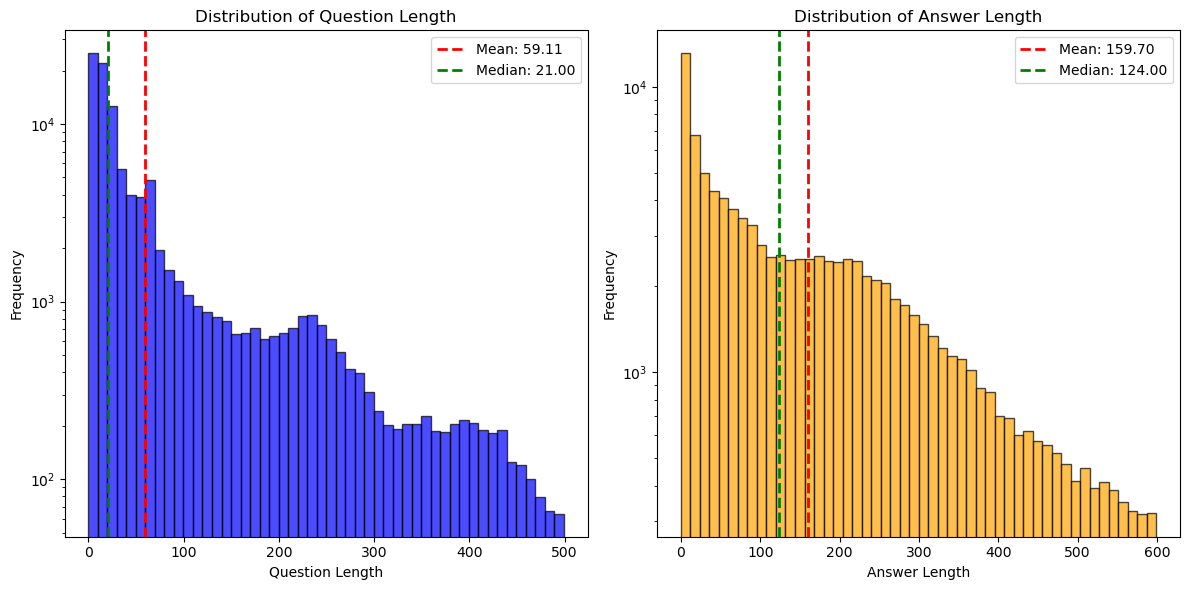

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 文件
file_path = './trace_for_booking_limit/sample_1e6_input<500_output<600.csv'
df = pd.read_csv(file_path)

# 提取 question_length 和 answer_length
question_length = df['question_length']
answer_length = df['answer_length']

# 绘制 question_length 和 answer_length 的柱状图
plt.figure(figsize=(12, 6))

# 设置子图，第一部分绘制 question_length 的柱状图
plt.subplot(1, 2, 1)
plt.hist(question_length, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Question Length')
plt.xlabel('Question Length')
plt.ylabel('Frequency')

# 标注 mean 和 median
mean_q = question_length.mean()
median_q = question_length.median()
plt.axvline(mean_q, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_q:.2f}')
plt.axvline(median_q, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_q:.2f}')
plt.legend()

# 对数坐标轴
plt.yscale('log')

# 第二部分绘制 answer_length 的柱状图
plt.subplot(1, 2, 2)
plt.hist(answer_length, bins=50, color='orange', alpha=0.7, edgecolor='black')
plt.title('Distribution of Answer Length')
plt.xlabel('Answer Length')
plt.ylabel('Frequency')

# 标注 mean 和 median
mean_a = answer_length.mean()
median_a = answer_length.median()
plt.axvline(mean_a, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_a:.2f}')
plt.axvline(median_a, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_a:.2f}')
plt.legend()

# 对数坐标轴
plt.yscale('log')

# 显示图表
plt.tight_layout()
plt.show()

Group Counts:
question_length_group
(0, 50]       631337
(50, 100]     120733
(100, 150]     40969
(150, 200]     30336
(200, 250]     34280
(250, 300]     20106
(300, 350]      9763
(350, 400]      9295
(400, 450]      7782
(450, 500]      3775
Name: count, dtype: int64

Answer Length Means per Group:
question_length_group
(0, 50]       156.358576
(50, 100]     171.146696
(100, 150]    167.758671
(150, 200]    157.294436
(200, 250]    138.437894
(250, 300]    159.605391
(300, 350]    183.624603
(350, 400]    182.626466
(400, 450]    196.545104
(450, 500]    229.564768
Name: answer_length, dtype: float64


/var/folders/1m/8g05bgls5xbf421lv3q0dk_00000gn/T/ipykernel_42246/2866123786.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  answer_length_means = df.groupby('question_length_group')['answer_length'].mean()


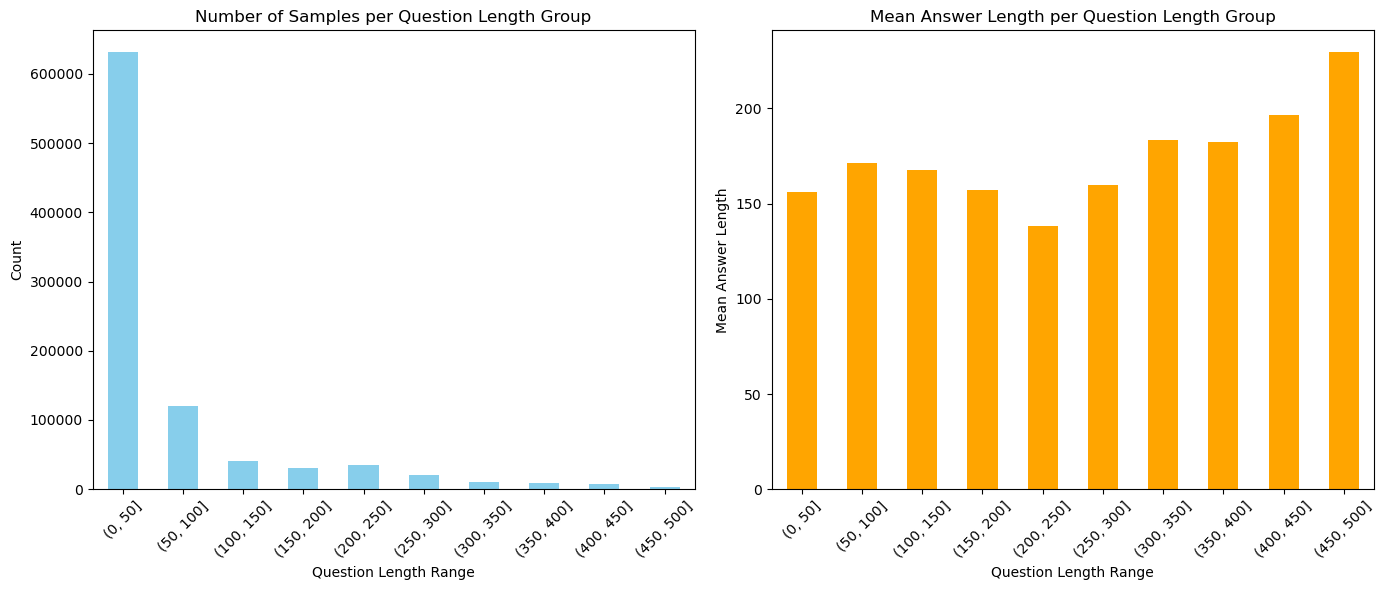

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 文件
file_path = './output_trace/input<500_output<600.csv'
df = pd.read_csv(file_path)

# 设置分组间隔
interval = 50  # 你可以根据需要调整此值

# 对 'question_length' 列进行分组
bins = range(0, df['question_length'].max() + interval, interval)
df['question_length_group'] = pd.cut(df['question_length'], bins=bins)

# 计算每个组的数量
group_counts = df['question_length_group'].value_counts().sort_index()

# 计算每个组内 'answer_length' 的均值
answer_length_means = df.groupby('question_length_group')['answer_length'].mean()

# 打印每个组的数量和均值
print("Group Counts:")
print(group_counts)
print("\nAnswer Length Means per Group:")
print(answer_length_means)

# 可选：绘制柱状图
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 绘制每个组的数量
group_counts.plot(kind='bar', color='skyblue', ax=ax[0])
ax[0].set_title('Number of Samples per Question Length Group')
ax[0].set_xlabel('Question Length Range')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=45)

# 绘制每个组内 answer_length 的均值
answer_length_means.plot(kind='bar', color='orange', ax=ax[1])
ax[1].set_title('Mean Answer Length per Question Length Group')
ax[1].set_xlabel('Question Length Range')
ax[1].set_ylabel('Mean Answer Length')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [16]:
[
{"type": "type1", "prefill": 50, "decode": 156, "arrival_rate": 167},
{"type": "type2", "prefill": 100, "decode": 171, "arrival_rate": 31},
{"type": "type3", "prefill": 150, "decode": 167, "arrival_rate": 10},
{"type": "type4", "prefill": 200, "decode": 157, "arrival_rate": 8},
{"type": "type5", "prefill": 250, "decode": 138, "arrival_rate": 9},
{"type": "type6", "prefill": 300, "decode": 159, "arrival_rate": 5},
{"type": "type7", "prefill": 350, "decode": 183, "arrival_rate": 3},
{"type": "type8", "prefill": 400, "decode": 182, "arrival_rate": 2},
{"type": "type9", "prefill": 450, "decode": 196, "arrival_rate": 2},
{"type": "type10", "prefill": 500, "decode": 229, "arrival_rate": 1},
]

[{'type': 'type1', 'prefill': 50, 'decode': 156, 'arrival_rate': 167},
 {'type': 'type2', 'prefill': 100, 'decode': 171, 'arrival_rate': 31},
 {'type': 'type3', 'prefill': 150, 'decode': 167, 'arrival_rate': 10},
 {'type': 'type4', 'prefill': 200, 'decode': 157, 'arrival_rate': 8},
 {'type': 'type5', 'prefill': 250, 'decode': 138, 'arrival_rate': 9},
 {'type': 'type6', 'prefill': 300, 'decode': 159, 'arrival_rate': 5},
 {'type': 'type7', 'prefill': 350, 'decode': 183, 'arrival_rate': 3},
 {'type': 'type8', 'prefill': 400, 'decode': 182, 'arrival_rate': 2},
 {'type': 'type9', 'prefill': 450, 'decode': 196, 'arrival_rate': 2},
 {'type': 'type10', 'prefill': 500, 'decode': 229, 'arrival_rate': 1}]

/var/folders/1m/8g05bgls5xbf421lv3q0dk_00000gn/T/ipykernel_42246/487524214.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  question_length_means = df.groupby('answer_length_group')['question_length'].mean()


Group Counts:
answer_length_group
(0, 50]       272435
(50, 100]     134325
(100, 150]     96860
(150, 200]     93667
(200, 250]     87955
(250, 300]     67646
(300, 350]     49363
(350, 400]     35064
(400, 450]     23568
(450, 500]     18930
(500, 550]     15281
(550, 600]     12083
Name: count, dtype: int64

Question Length Means per Group:
answer_length_group
(0, 50]       52.936528
(50, 100]     60.039516
(100, 150]    64.871227
(150, 200]    58.692122
(200, 250]    55.120573
(250, 300]    57.933965
(300, 350]    64.691874
(350, 400]    68.882729
(400, 450]    66.756916
(450, 500]    69.254939
(500, 550]    75.605000
(550, 600]    83.013490
Name: question_length, dtype: float64


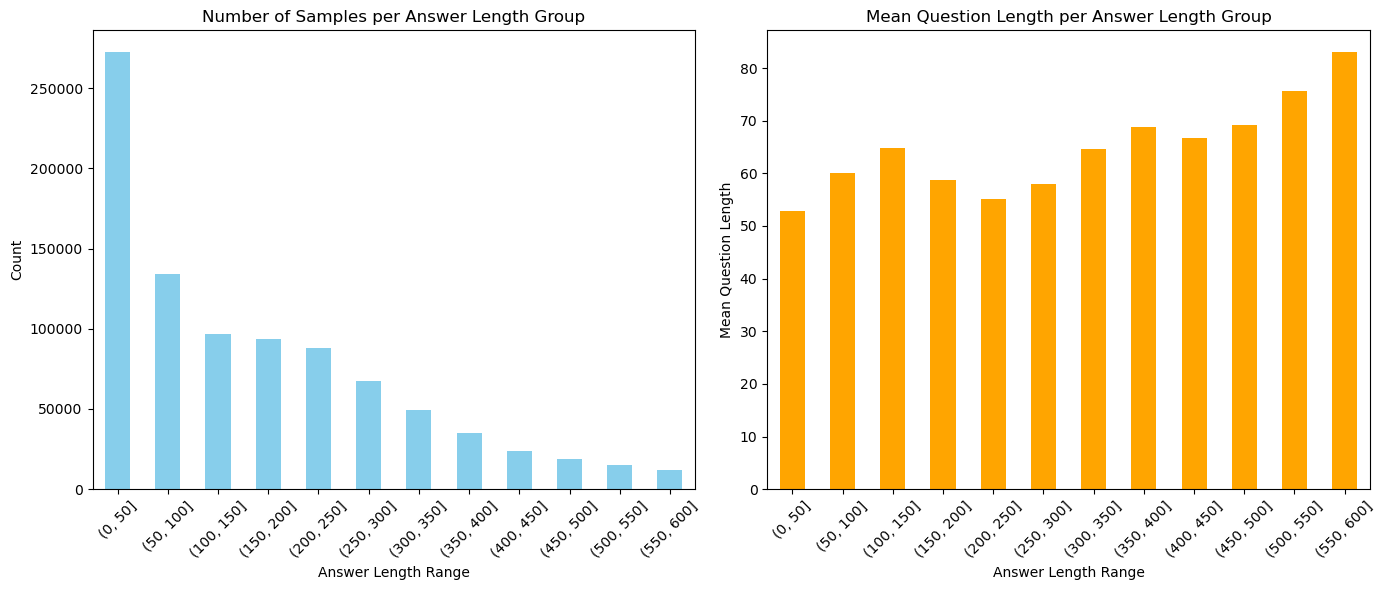

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 文件
file_path = './output_trace/input<500_output<600.csv'
df = pd.read_csv(file_path)

# 设置分组间隔
interval = 50  # 你可以根据需要调整此值

# 对 'answer_length' 列进行分组
bins = range(0, df['answer_length'].max() + interval, interval)
df['answer_length_group'] = pd.cut(df['answer_length'], bins=bins)

# 计算每个组的数量
group_counts = df['answer_length_group'].value_counts().sort_index()

# 计算每个组内 'question_length' 的均值
question_length_means = df.groupby('answer_length_group')['question_length'].mean()

# 打印每个组的数量和均值
print("Group Counts:")
print(group_counts)
print("\nQuestion Length Means per Group:")
print(question_length_means)

# 可选：绘制柱状图
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 绘制每个组的数量
group_counts.plot(kind='bar', color='skyblue', ax=ax[0])
ax[0].set_title('Number of Samples per Answer Length Group')
ax[0].set_xlabel('Answer Length Range')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=45)

# 绘制每个组内 question_length 的均值
question_length_means.plot(kind='bar', color='orange', ax=ax[1])
ax[1].set_title('Mean Question Length per Answer Length Group')
ax[1].set_xlabel('Answer Length Range')
ax[1].set_ylabel('Mean Question Length')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [18]:
print("Group Counts:")
print(group_counts/12083)

Group Counts:
answer_length_group
(0, 50]       22.546967
(50, 100]     11.116858
(100, 150]     8.016221
(150, 200]     7.751966
(200, 250]     7.279235
(250, 300]     5.598444
(300, 350]     4.085326
(350, 400]     2.901928
(400, 450]     1.950509
(450, 500]     1.566664
(500, 550]     1.264669
(550, 600]     1.000000
Name: count, dtype: float64


In [19]:
[
{"type": "type1", "prefill": 60, "decode": 50, "arrival_rate": 23},
{"type": "type2", "prefill": 60, "decode": 100, "arrival_rate": 11},
{"type": "type3", "prefill": 60, "decode": 150, "arrival_rate": 8},
{"type": "type4", "prefill": 60, "decode": 200, "arrival_rate": 7},
{"type": "type5", "prefill": 60, "decode": 250, "arrival_rate": 6},
{"type": "type6", "prefill": 60, "decode": 300, "arrival_rate": 4},
{"type": "type7", "prefill": 60, "decode": 350, "arrival_rate": 3},
{"type": "type8", "prefill": 60, "decode": 400, "arrival_rate": 2},
{"type": "type9", "prefill": 60, "decode": 450, "arrival_rate": 1},
{"type": "type10", "prefill": 60, "decode": 500, "arrival_rate": 1},
]

[{'type': 'type1', 'prefill': 60, 'decode': 50, 'arrival_rate': 23},
 {'type': 'type2', 'prefill': 60, 'decode': 100, 'arrival_rate': 11},
 {'type': 'type3', 'prefill': 60, 'decode': 150, 'arrival_rate': 8},
 {'type': 'type4', 'prefill': 60, 'decode': 200, 'arrival_rate': 7},
 {'type': 'type5', 'prefill': 60, 'decode': 250, 'arrival_rate': 6},
 {'type': 'type6', 'prefill': 60, 'decode': 300, 'arrival_rate': 4},
 {'type': 'type7', 'prefill': 60, 'decode': 350, 'arrival_rate': 3},
 {'type': 'type8', 'prefill': 60, 'decode': 400, 'arrival_rate': 2},
 {'type': 'type9', 'prefill': 60, 'decode': 450, 'arrival_rate': 1},
 {'type': 'type10', 'prefill': 60, 'decode': 500, 'arrival_rate': 1}]